<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO3/Proyecto3_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 3: Filtros</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

#<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

#<b>Entregable</b>

##<h4><b>1. </b>Del artículo <b>[3]</b>, consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means. Mostrar cómo se podrían implementar en Python.</h4>

<b>Robust LOESS (Locally Estimated Scatterplot Smoothing):</b> Es un método de reducción de ruido aplicable a señales no paramétricas, que funciona con el ajuste de una función de regresión para un conjunto de datos a partir de una ventana deslizante. La ventana toma diferentes valores locales y realiza un ajuste por mínimos cuadrados ponderados, de acuerdo a un parámetro de suavización $α$, que se puede establecer en el siguiente rango:

<h4>$(λ + 1)/n \lt α \lt 1$</h4>

<b>Donde</b>
> $λ$ es el grado del polinomio local<br>
$n$ es el número de datos de la señal

Valores más cercanos a la unidad, resultan en curvas más suaves, mientras que valores pequeños del parámetro pueden implicar un sobreajuste de la curva a los datos. Se recomienda definir $\alpha$ en un rango aproximado de 0,25 a 0,5 <b>[4]</b>.

Esta técnica es relativamente resistente a valores atípicos o ruido en los datos, teniendo en cuenta el tipo de regresión que se utilice, lo que depende de la tendencia de dispersión de los datos. Por lo general, se usa una regresión polinómica de grado 2 en adelante, o una regresión lineal si la distribución de puntos no tiene un patrón tan desordenado o si se desea obtener una función menos compleja que no se ajuste con gran precisión a todos los datos, necesariamente. El proceso para aplicar este método de suavizado se describe así:

><b>1. Selección de datos con ventanas locales:</b> se recorren los valores del vector de datos con una ventana, definida por el parámetro de suavizado ($α$), que abarca los puntos más cercanos a un valor central.<br>
<b>2. Ponderación de puntos:</b> se calculan pesos de los puntos de acuerdo a su distancia del valor central de la ventana local; mientras más cerca estén del centro, más peso se les asigna.<br>
<b>3. Función de regresión local:</b> luego de definir los pesos de cada punto dentro de la ventana, se construye una función de regresión polinómica (la regresión lineal cuenta como una polinómica de grado 1) con dichos pesos como coeficientes de los puntos vecinos. Los datos atípicos se caracterizan por presentar una mayor distancia del punto central en cierta ventana, por lo que se les asigna un peso menor y no tiene una influencia significativa en la estimación del modelo final.

A continuación, se presenta la implementación de este método en código. Se importa el módulo ```statsmodels.api```que tiene la función ```lowess``` para aplicar el suavizado de dispersión estimado localmente. Se deben definir parámetros como el porcentaje de datos a tomar en la ventana local (equiparable a definir $α$) y las iteraciones de estimación de cada ventana.

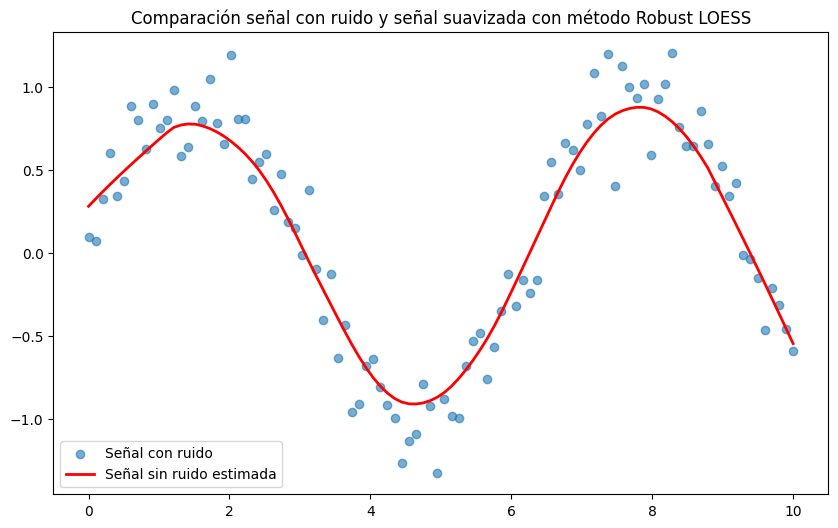

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

alpha = 0.25
iterations = 3
lowess = sm.nonparametric.lowess(y, x, frac=alpha, it=iterations)
y_smoothed = lowess[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Señal con ruido", alpha=0.6)
plt.plot(x, y_smoothed, label="Señal sin ruido estimada", color='red', linewidth=2)
plt.legend()
plt.title('Comparación señal con ruido y señal suavizada con método Robust LOESS')
plt.show()

<b>Non-Local Means (NLM):</b> Es un método para reducir ruido en imágenes, señales y demás tipos de conjuntos de datos. Consiste en la estimación de valores por comparación con puntos adyacentes o con puntos de características similares que no necesariamente son vecinos, pero se encuentran en una ventana local. La comparación de puntos se desarrolla mediante la medición de la distancia euclidiana cuadrada entre parches (que equivalen a ventanas locales que encierra solo una porción de los datos) centrados en diferentes puntos. A partir del cálculo de la distancia, se definen pesos para promediar los valores de la señal en diferentes proporciones de los puntos del parche <b>[5]</b>.

Para construir el algoritmo de NLM, se consideran las siguientes expresiones:

<h4>$\hat{u}_i(p) = \frac{1}{C(p)} \sum_{q \in B(p, r)} u_i(q)w(p, q), \quad
C(p) = \sum_{q \in B(p, r)} w(p, q) , \quad w(p, q) = e^{-\frac{\max(d^2 - 2\sigma^2, 0.0)}{h^2}}
$</h4>

<b>Donde</b>
> $\hat{u}_i(p)$ es un valor $i$ filtrado de la señal centrada en $p$<br>
$B(p,r)$ es un parche centrado en $p$ con tamaño $(2r+1) × (2r+1)$<br>
$w(p,q)$ es el peso de los valores de la señal (donde $d^2=d^2(B(p,f),B(q,f))$, $σ$ es la desviación estándar y $h$ es un parámetro de filtrado definido según $σ$)<br>
$u_i(q)$ es un valor original de la señal centrado en $q$

Aplicar este método a bioseñales, se puede mejorar su calidad al reducir el ruido debido a interferencia eléctrica o artefactos de movimiento sin afectar gravemente los componentes carácterísticos de la señal. Algunos pasos que comúnmente se aplican para este método son los siguientes:

><b>1. Definición de parche o ventana: </b> se define un área de puntos que abarca el parche o ventana donde se hace la comparación de similitud. Esta área debe ser amplia si se requiere establecer similitudes entre puntos no cercanos.<br>
<b>2. Ponderación de datos similares:</b> mediante el cálculo de la distancia euclídea se calculan las similitudes entre el punto central y los demás puntos, y a partir de la distancia se asignan pesos para cada punto comparado.<br>
<b>3. Suavizado:</b> se remplazan los valores que contiene ruido por nuevos valores estimados con la media ponderada de la ventana local o parche.

A continuación, se presenta la implementación de este método en código. Se deben definir parámetros como el tamaño del parche o ventana, el tamaño de ventana de búsqueda de parches cercanos o similares, y el parámetro de filtrado $h$ para la función de pesos $w(p,q)$.

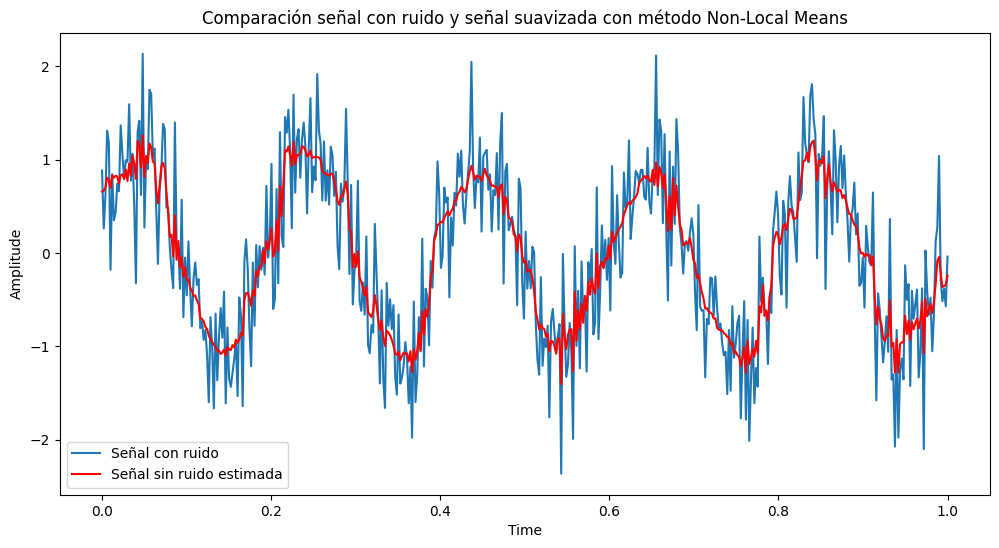

In [2]:
def non_local_means(signal, patch_size=5, search_window=20, h=1.0):
    n = len(signal)
    filtered_signal = np.zeros(n)
    normalization = np.zeros(n)

    half_patch = patch_size // 2
    half_window = search_window // 2

    padded_signal = np.pad(signal, (half_patch, half_patch), mode='symmetric')
    for i in range(n):
        patch_i = padded_signal[i:i + patch_size]
        weights_sum = 0
        weighted_value_sum = 0

        for j in range(max(i - half_window, 0), min(i + half_window + 1, n)):
            if j == i:
                continue

            patch_j = padded_signal[j:j + patch_size]
            d2 = np.sum((patch_i - patch_j) ** 2) / patch_size
            weight = np.exp(-max(d2 - 2 * h**2, 0) / h**2)
            weights_sum += weight
            weighted_value_sum += weight * signal[j]
        filtered_signal[i] = (weighted_value_sum + signal[i]) / (weights_sum + 1)
    return filtered_signal

np.random.seed(0)
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=t.shape)
denoised_signal = non_local_means(signal, patch_size=5, search_window=20, h=0.5)

plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Señal con ruido")
plt.plot(t, denoised_signal, label="Señal sin ruido estimada", color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Comparación señal con ruido y señal suavizada con método Non-Local Means')
plt.show()

##<h4><b>2. </b>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>).</h4>



Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIBB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1sMFf2cTo8-dqhe6M75dvQLkE-cEPaHih?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats

ruta_SB = '/content/drive/MyDrive/ECGData/ECGData_SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGData/ECGData_AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Cantidad archivos = 5669


##<h4><b>3. </b>Consultar qué otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta.</h4>

<b>Selección de la Wavelet</b>

Para el análisis de las señales de electrocardiograma (ECG) en este Proyecto se ha elegido la wavelet madre Daubechies 4 (db4), tras realizar una revisión exhaustiva de la literatura. Diversos estudios han demostrado que la familia de wavelets Daubechies es especialmente adecuada para la detección y caracterización de los complejos QRS en señales ECG, debido a su capacidad para identificar transiciones rápidas y detectar con precisión ondas características como las ondas R y S <b>[8]</b>.

Además de la Daubechies 4, se consideraron otras wavelets como la Daubechies 8, Symlet 6 y Symlet 8, las cuales también se mencionan en la literatura para el análisis de ECG. La Daubechies 8 fue valorada debido a que, al igual que la Daubechies 4, proporciona una buena localización de los puntos Q y S en los complejos QRS; sin embargo, sufre de una mayor incidencia de detecciones falsas en señales ruidosas, lo cual reduce la precisión general en la identificación de latidos reales. Por su parte, la Symlet 6 y la Symlet 8 presentan una buena detección de las ondas R y logran captar el complejo QRS completo, pero también presentan un alto número de falsos positivos en algunas señales específicas, lo que afecta su fiabilidad. En particular, se observó que la Symlet 8 tiene una tendencia a detectar picos inexistentes en presencia de ruido, lo que la hace menos ideal en comparación con la Daubechies 4 <b>[6,8]</b>.

Según González, López y Jaramillo <b>[7]</b>, la Daubechies 4 ofrece un ajuste óptimo a las características de la señal ECG, destacándose por su similitud en forma y su capacidad para captar las variaciones abruptas propias de los complejos QRS. Este aspecto es esencial para evitar errores de detección, sobre todo en presencia de ruido. Asimismo, Quintana Morales <b>[6]</b> demostró que la wavelet Daubechies proporciona resultados superiores en comparación con otras wavelets en términos de precisión y confiabilidad en la detección de latidos, lo que la hace ideal para aplicaciones en medicina, especialmente en análisis de ECG.

A partir de esta revisión bibliográfica, se concluye que la wavelet Daubechies 4 es la mejor opción para el análisis de señales ECG en este proyecto, debido a su capacidad para proporcionar un alto nivel de precisión en la identificación de latidos reales y una baja tasa de detecciones falsas, lo cual es fundamental para un análisis fiable y clínicamente relevante de las señales cardíacas <b>[8]</b>.


In [5]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.9 MB/s eta 0:00:00


In [6]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def filter_ecg_wavelet(ecg_signal, wavelet_type='db4', level=3):
    data_wavelet = pywt.wavedec(ecg_signal, wavelet_type, level=level)
    details = data_wavelet[1:]

    def wnoisest(coeff):
        stdc = np.zeros((len(coeff), 1))
        for i in range(len(coeff)):
            stdc[i] = (np.median(np.abs(coeff[i]))) / 0.6745
        return stdc

    def threshold(coeff):
        Num_samples = sum([c.shape[0] for c in coeff])
        thr = np.sqrt(2 * np.log(Num_samples))
        return thr

    def wthresh(coeff):
        y = []
        s = wnoisest(coeff)
        thr = threshold(coeff)
        for i in range(len(coeff)):
            y.append(np.multiply(coeff[i], np.abs(coeff[i]) > (thr * s[i])))
        return thr, s, y

    thr, s, details_t = wthresh(details)
    coeff = [data_wavelet[0]] + details_t
    x_rec = pywt.waverec(coeff, wavelet_type)
    x_rec = x_rec[:ecg_signal.shape[0]]

    return x_rec

In [7]:
from scipy.signal import find_peaks

def detectar_picos_R(ecg_signal, distancia_minima, umbral):
    # Identificar los picos que corresponden a las ondas R esto para identificar cada que ocurre un ciclo
    picos, _ = find_peaks(ecg_signal, distance=distancia_minima, height=umbral)
    return picos

In [8]:
def particionar_por_ciclos(ecg_signal, picos_R, muestras_antes, muestras_despues):
    ciclos = []
    for pico in picos_R:
        inicio = max(0, pico - muestras_antes)
        fin = min(len(ecg_signal), pico + muestras_despues)
        ciclos.append(ecg_signal[inicio:fin])
    return ciclos

##<h4><b>4. </b>Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:</h4>

<blockquote><h4><b>Flujo 1:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 2:</b></h4><blockquote>
<h4><b>1.</b> Detrend<br>
<b>2.</b> Filtro wavelet modificado del punto 3<br>
<b>3.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR</h4>
</blockquote></blockquote>

<blockquote><h4><b>Flujo 3:</b></h4><blockquote>
<h4><b>1.</b> Filtro pasa-altas usando filtro IIR a 0.5 Hz<br>
<b>2.</b> Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR<br></h4>
</blockquote></blockquote>

<h4>Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, flujo 2 o flujo 3. Con el flujo seleccionado procesar las señales de la base de datos <i>ECGData.zip</i> (derivación II). En este punto deberíamos estar en el mismo punto donde partimos en el proyecto 2, con señales filtradas.</h4>

<h4>A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.</h4>

###<b>Flujo 1</b>

Para el flujo 1 se define primero un filtro IIR pasa altas con frecuencia de corte de 0.5 Hz. Se define un orden de 5, ya que se observa una respuesta al impulso estable y casi ideal en dicho orden. La frecuencia de corte normalizada se calcula en base a la frecuencia de muestreo de las señales ECG, la cual según la referencia del origen de los datos es de 500 Hz.

In [17]:
def highpass_IIR(raw_signal, order=5, fc=0.5, fs=500):
  nyquist = fs / 2
  w_normalized = fc/nyquist
  b_high, a_high = signal.iirfilter(order, w_normalized, btype='highpass')
  filtered_signal = signal.lfilter(b_high, a_high, raw_signal)

  return filtered_signal, b_high, a_high, w_normalized

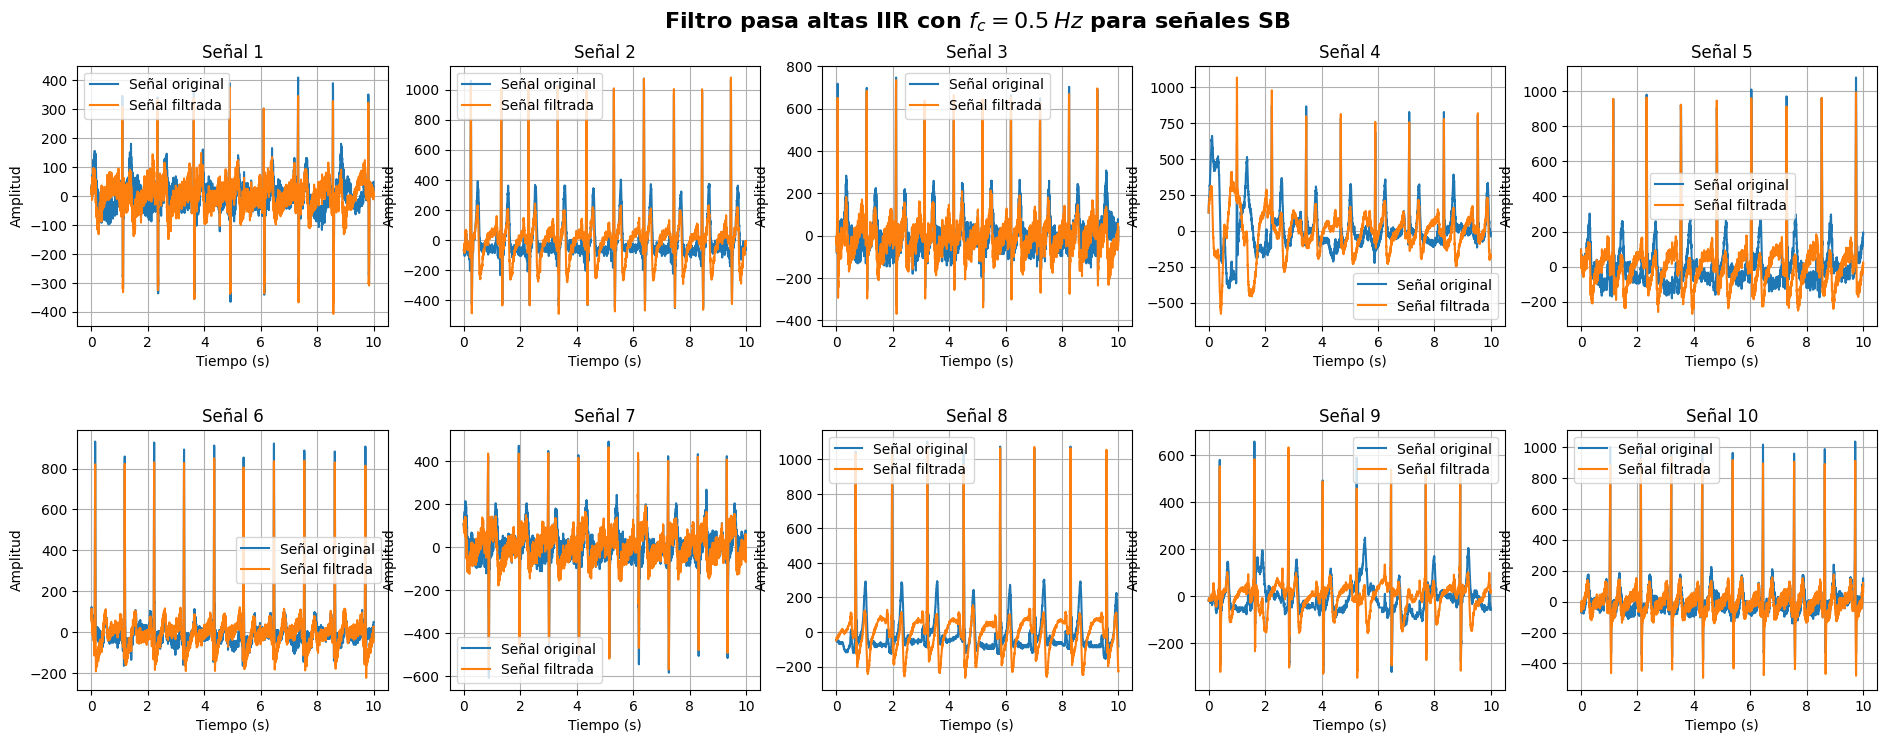

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa altas IIR con $f_c=0.5 \: Hz$ para señales SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  ax.set_title(f'Señal {i + 1}')
  ax.set_ylabel('Amplitud')
  ax.set_xlabel('Tiempo (s)')
  ax.plot(n, sig, label='Señal original')
  ax.plot(n, filtered_signal[0], label='Señal filtrada')
  ax.legend()
  ax.grid()
plt.show()

In [19]:
def mfreqz(b_iir, a_iir, i, w_normalized, type, nyq_rate=1):
    w_iir, h_iir = signal.freqz(b_iir, a_iir);
    h_dB_iir = 20 * np.log10 (abs(h_iir)+1e-10)

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Respuesta al impulso en frecuencia filtro IIR para señal {i} de {type}', x=0.5, y=0.99, fontsize=14, fontweight='bold')
    axs[0].plot((w_iir/max(w_iir))*nyq_rate, abs(h_iir))
    axs[0].set(ylabel='Magnitud', title=r'Respuesta en frecuencia', xticks=np.arange(0, 1, 0.001), xlim=(0, 0.01))
    axs[0].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot((w_iir/max(w_iir))*nyq_rate, h_dB_iir)
    axs[1].set(ylabel='Magnitud (dB)', xlabel=r'Frecuencia normalizada (x$\pi$rad/sample)', title=r'Respuesta en frecuencia (dB)', xticks=np.arange(0, 1, 0.001), xlim=(0, 0.01))
    axs[1].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[1].legend()
    axs[1].grid()

    h_Phase = np.unwrap(np.arctan2(np.imag(h_iir),np.real(h_iir)))
    axs[2].plot((w_iir/max(w_iir))*nyq_rate, h_Phase)
    axs[2].set(ylabel='Fase (rad)', title=r'Respuesta en fase', xticks=np.arange(0, 1, 0.001), xlim=(0, 0.01))
    axs[2].axvline(x=w_normalized*nyq_rate, linestyle='--', label='$f_c$', color='red')
    axs[2].legend()
    axs[2].grid()

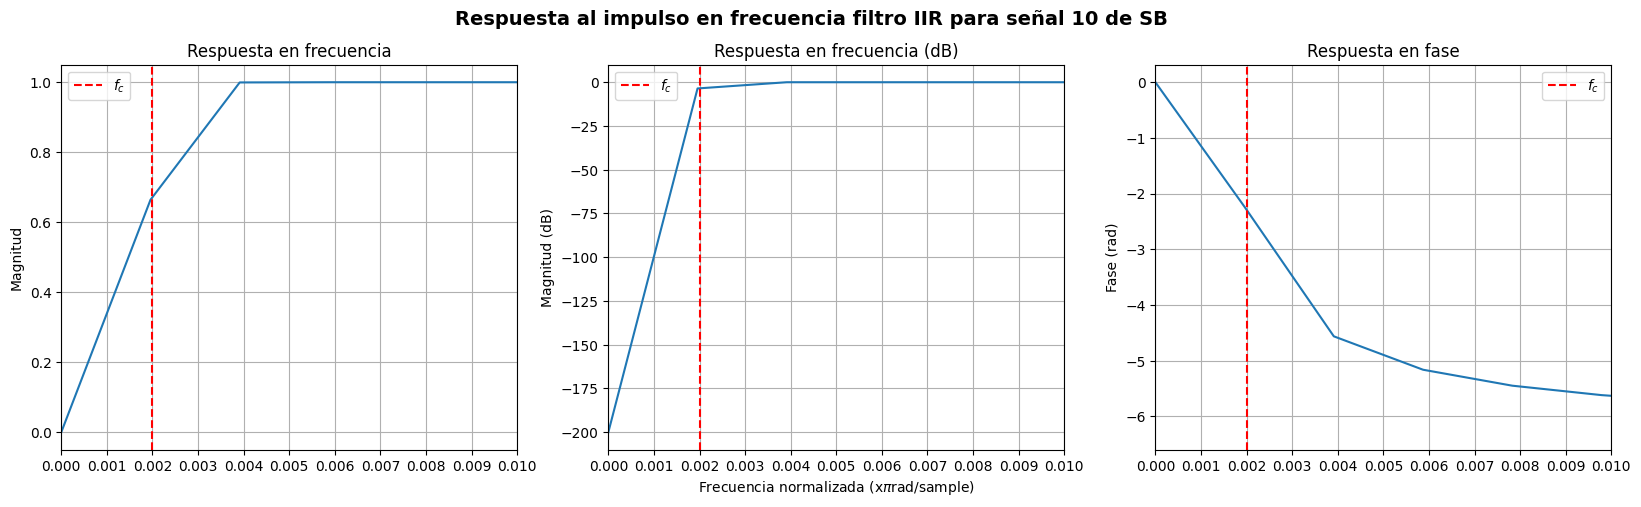

In [20]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'SB')

Como la frecuencia de corte normalizada resulta en un valor muy cercano a 0 $\big( w_n = \frac{0.5 \: Hz}{500 \: Hz/2} = 0.002 \big)$, puede concluirse que el orden de 5 para el filtro cumple con la atenuación deseada de -3dB o 0.7 (para la magnitud adimensional) a partir de aproximadamente la frecuencia de corte. El comportamiento del filtro para las 10 señales seleccionadas se puede generalizar con la respuesta de la última señal.

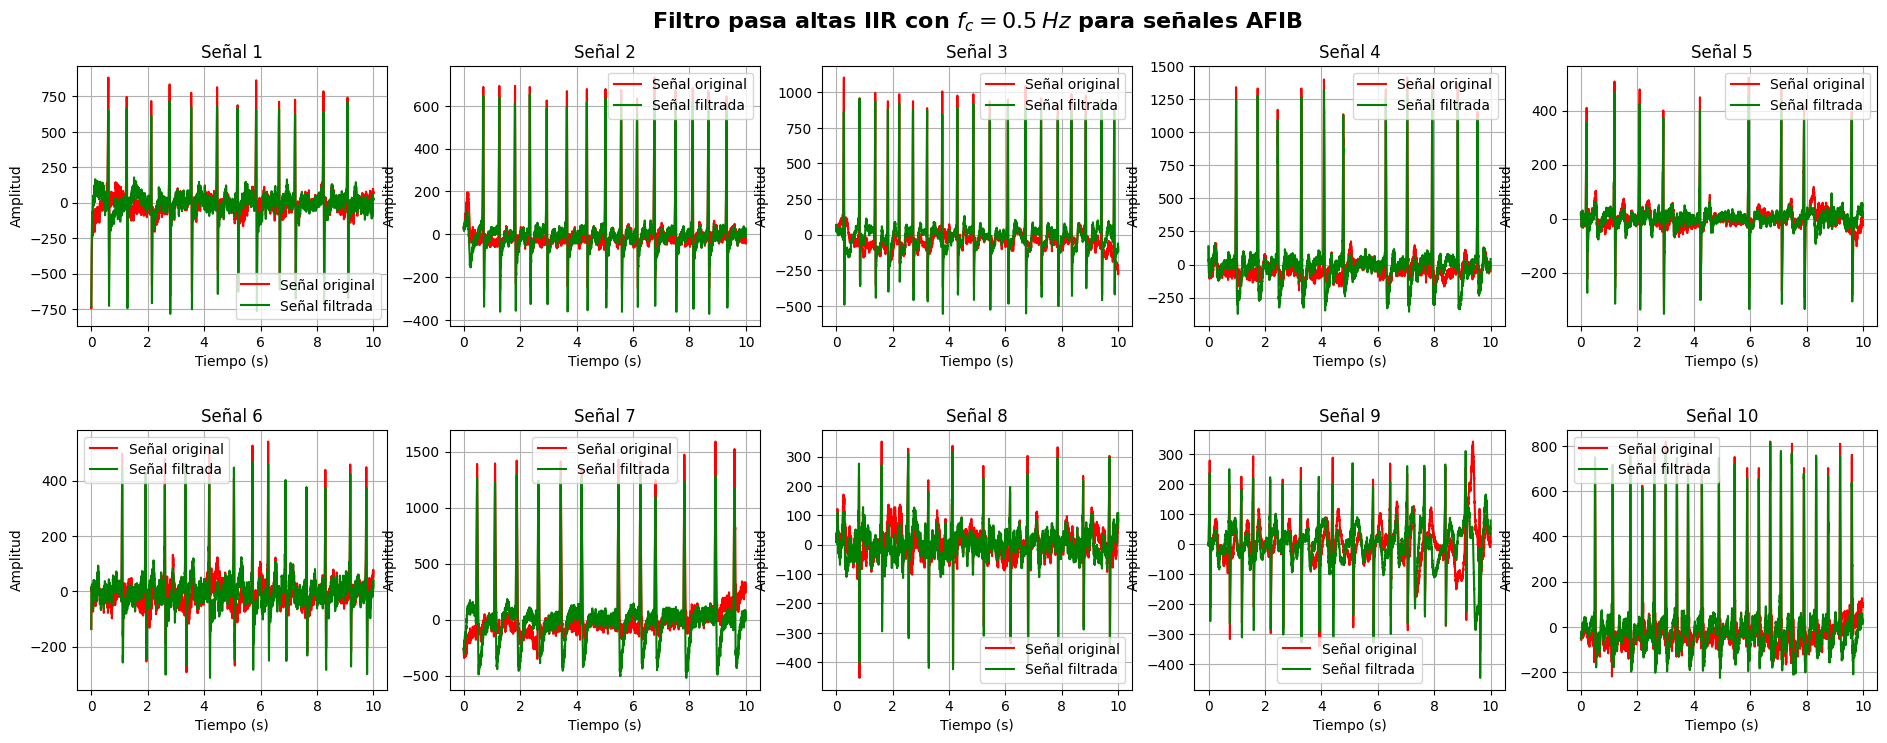

In [39]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro pasa altas IIR con $f_c=0.5 \: Hz$ para señales AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  n = np.arange(0, len(filtered_signal[0])/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  ax.set_title(f'Señal {i + 1}')
  ax.set_ylabel('Amplitud')
  ax.set_xlabel('Tiempo (s)')
  ax.plot(n, sig, label='Señal original', color='red')
  ax.plot(n, filtered_signal[0], label='Señal filtrada', color='green')
  ax.legend()
  ax.grid()
plt.show()

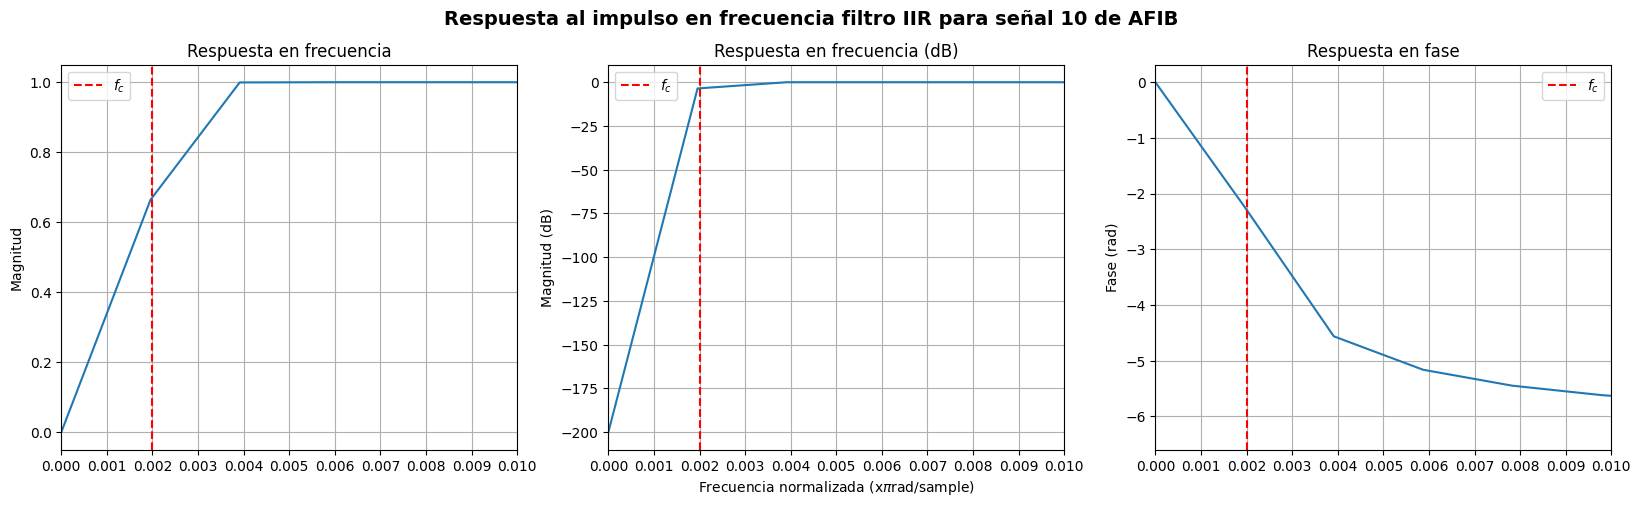

In [22]:
mfreqz(filtered_signal[1], filtered_signal[2], i+1, filtered_signal[3], 'AFIB')

Luego de aplicar el filtro pasa altas, se implementa el filtrado con el wavelet seleccionado correspondiente al Daubechies 4 (db4). Se observa una atenuación de frecuencias bajas de ruido después de aplicar el wavelet, las cuales no se filtraron correctamente solo con el filtro pasa altas anterior.

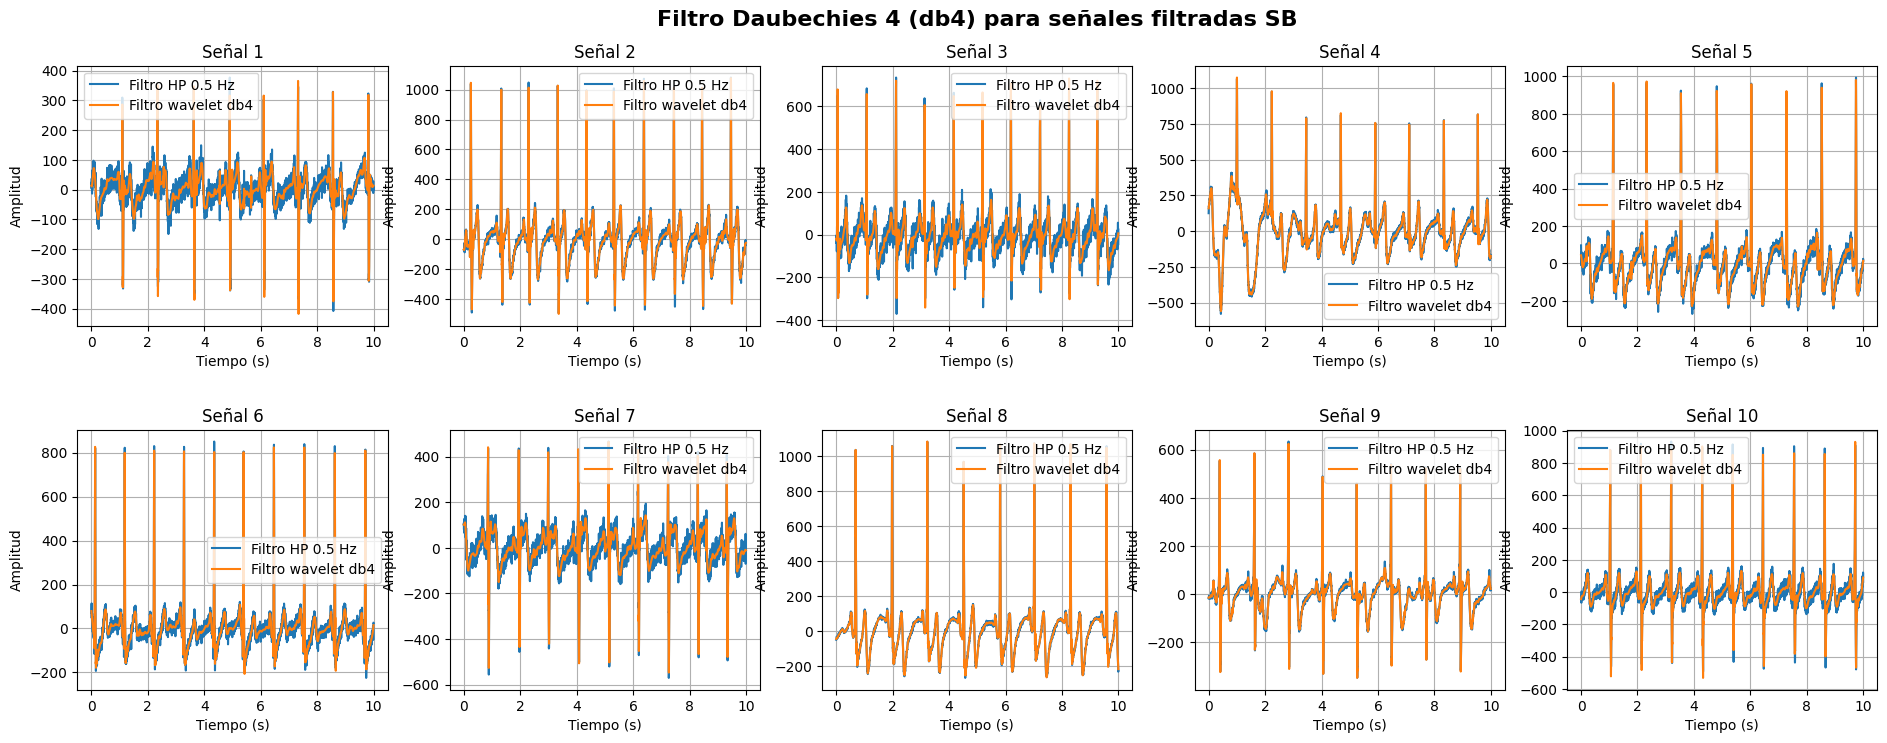

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro Daubechies 4 (db4) para señales filtradas SB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  ax.set_title(f'Señal {i + 1}')
  ax.set_ylabel('Amplitud')
  ax.set_xlabel('Tiempo (s)')
  ax.plot(n, filtered_signal[0], label='Filtro HP 0.5 Hz')
  ax.plot(n, db4_signal, label='Filtro wavelet db4')
  ax.legend()
  ax.grid()
plt.show()

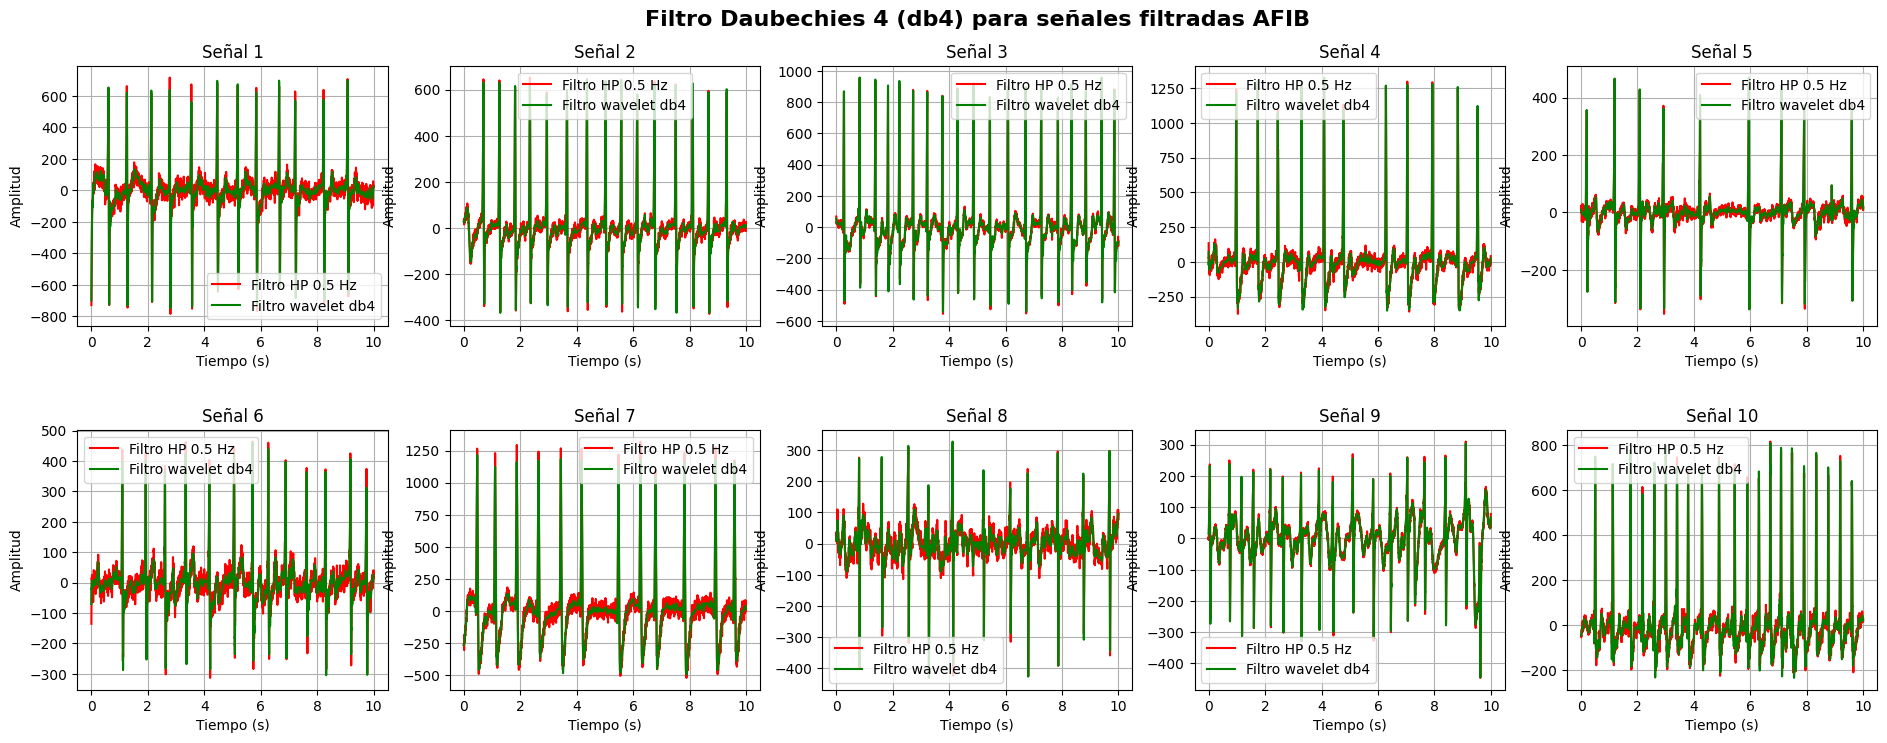

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Filtro Daubechies 4 (db4) para señales filtradas AFIB', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:10]):
  signal_df = pd.read_csv(archivo, header=None, names=['II'])
  signal_df = signal_df.apply(pd.to_numeric, errors='coerce')
  sig = signal_df['II'].values[1:]
  filtered_signal = highpass_IIR(sig)
  db4_signal = filter_ecg_wavelet(filtered_signal[0], level=4)
  n = np.arange(0, len(db4_signal)/fs, 1/fs)

  ax = axs[i // 5, i % 5]
  ax.set_title(f'Señal {i + 1}')
  ax.set_ylabel('Amplitud')
  ax.set_xlabel('Tiempo (s)')
  ax.plot(n, filtered_signal[0], label='Filtro HP 0.5 Hz', color='red')
  ax.plot(n, db4_signal, label='Filtro wavelet db4', color='green')
  ax.legend()
  ax.grid()
plt.show()

Posteriormente, se contruye el filtro pasa bajas con $f_c = 50 \: Hz$ de tipo FIR. Con este tipo de filtro se obtiene una respuesta en fase más estable que en los de tipo IIR, lo que permite preservar las componentes características de la señal ECG (como el complejo QRS, onda P, etc) en los tiempos correspondientes. Es importante considerar esto debido a que desfases considerables en la señal la hacen inadecuada para generar diagnósticos y/o análisis fisiológicos válidos.

Adicionalmente, los filtros FIR son potencialmente más estables que los IIR por no tener coeficientes de realimentación en el denominador que puedan causar indeterminaciones o complejidades cuando tomas valores específicos. La estabilidad es deseable en el ámbito médico, en tanto que se trabaja con señales no paramétricas y que pueden presentar variaciones importantes.

Una desventaja de este tipo de filtro es la necesidad de definir órdenes grandes, lo que implica el uso de más coeficientes y mayor gasto computacional.

###<b>Flujo 2</b>

Para el flujo 2 se realiza primero un detrend de las señales seleccionadas y se aplica el filtro wavelet modificado de las señales con detrending.

<h1>**AGREGAR AQUÍ LO DEL WAVELET**</h1>

###<b>Flujo 3</b>

Para la parte inicial del flujo 3 se aplican los mismo filtros pasa altas IIR y pasa bajas IIR del flujo 1.

<h1>**AGREGAR AQUÍ LO DEL WAVELET**</h1>

###<h4>Después de seleccionarse uno de los flujos de trabajo y obtener las señales filtradas, se aplica el proceso de normalización del Proyecto 2.</h4>

In [ ]:
def compresion(signal):
  signal = np.array(signal)
  signal_without_dc = signal - np.mean(signal)
  x_min = np.min(signal_without_dc)
  x_max = np.max(signal_without_dc)
  s_tk = (signal_without_dc - x_min) / (x_max - x_min)

  return s_tk

##<h4><b>5. </b>Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch.</h4>

##<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP).</h4>

##<h4><b>7. </b>Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis. Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.</h4>

##<h4><b>8. </b>Hacer un informe con todos los puntos anteriores.</h4>

<b><u>Discusión</u></b><br>

<b><u>Conclusiones</u></b>

#<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto3 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[4]:</b> Wikipedia. (5 de Diciembre, 2023). <i>Regresión local</i>. Wikipedia, La enciclopedia libre. Recuperado de https://es.wikipedia.org/wiki/Regresi%C3%B3n_local

<b>[5]:</b> Antoni Buades, Bartomeu Coll, and Jean-Michel Morel, <i>Non-Local Means Denoising</i>, Image Processing On Line, 1 (2011), pp. 208–212. https://doi.org/10.5201/ipol.2011.bcm_nlm

<b>[6]:</b> Quintana Morales, H. (2006). <i>Sistema de análisis y clasificación de la señal ECG basado en transformada wavelets</i> (Proyecto fin de carrera). Escuela Universitaria de Ingeniería Técnica de Telecomunicación, Universidad de Las Palmas de Gran Canaria.

<b>[7]:</b> González, J. R., López, R., & Jaramillo, Á. (2016). Wavelets in the analysis of EKG. <i>Scientia et Technica, 21</i>(3), 123-130. Universidad Tecnológica de Pereira. Pereira, Risaralda.

<b>[8]:</b> Pinto Moreno, E. (2012). Anexo I: Familia de wavelets. En <i>Análisis y evaluación de los niveles de energía obtenidos mediante WPT para defectología en ejes</i> (Proyecto fin de carrera). Escuela Politécnica Superior, Departamento de Ingeniería Mecánica, Universidad Carlos III de Madrid.